**Investigating the Adoption of Research Software**

Category: Software Quality

Profile: Developers

Factor Analysis

***1) Import Required Libraries***

In [1]:
%matplotlib inline

import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statistics as s
import scipy.stats as stats
from scipy.stats import ttest_ind


***2) Loading and Preprocessing Data***

In [2]:
from google.colab import files
import io
uploaded = files.upload()


Saving Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx to Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx


In [3]:
file_name = next(iter(uploaded))
file_name

'Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx'

In [4]:
df = pd.read_excel(file_name)

df

,PERFIL,TEMPO_USO,FREQUENCIA_USO,IDADE,GENERO,FORMACAO,ANOS_EXPERIENCIA,UTILIZACAO_D01F01,UTILIZACAO_D01F02,UTILIZACAO_D01F03,...,QUALIDADE_D02F07,QUALIDADE_D02F08,NAO_ADOCAO_D03F01,NAO_ADOCAO_D03F02,NAO_ADOCAO_D03F03,NAO_ADOCAO_D03F04,NAO_ADOCAO_D03F05,NAO_ADOCAO_D03F06,NAO_ADOCAO_D03F07,NAO_ADOCAO_D03F08
0,1.0,3.0,3.0,2.0,1.0,4.0,3.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,1.0,4.0,4.0,1.0,2.0,4.0,2.0,4.0,2.0,3.0,...,2.0,2.0,4.0,5.0,2.0,4.0,2.0,3.0,4.0,3.0
2,1.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,5.0,4.0,...,5.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,5.0,4.0
3,1.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,3.0,4.0,...,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,5.0,3.0
4,1.0,1.0,5.0,3.0,1.0,4.0,2.0,5.0,3.0,5.0,...,4.0,5.0,5.0,5.0,3.0,4.0,2.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0,3.0,4.0,...,4.0,4.0,5.0,5.0,4.0,4.0,3.0,0.0,4.0,4.0
169,2.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,3.0,5.0,...,2.0,4.0,5.0,5.0,4.0,4.0,2.0,3.0,2.0,4.0
170,2.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,2.0,4.0,...,4.0,5.0,4.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0
171,2.0,4.0,3.0,2.0,2.0,5.0,3.0,4.0,4.0,5.0,...,4.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,5.0,5.0



***3) Category: Software Quality***

D02F01 = Have functional suitability

D02F02 = Have performance

D02F03 = Have compatibility

D02F04 = Have usability

D02F05 = Have reliability

D02F06 = Have security

D02F07 = Have maintainability

D02F08 = Have portability

Total of respondents users =  143

Total of respondents developers =  30

In [5]:
print("Profile: Users - Category: Quality")

# Selecting columns
df3 = df.loc[df['PERFIL'] == 1.0, lambda df:['QUALIDADE_D02F01', 'QUALIDADE_D02F02', 'QUALIDADE_D02F03', 'QUALIDADE_D02F04', 'QUALIDADE_D02F05', 'QUALIDADE_D02F06', 'QUALIDADE_D02F07', 'QUALIDADE_D02F08' ]]
df3.columns = ['D02F01', 'D02F02','D02F03', 'D02F04', 'D02F05', 'D02F06', 'D02F07', 'D02F08']
df3_fa = df3
df3


Profile: Users - Category: Quality


,D02F01,D02F02,D02F03,D02F04,D02F05,D02F06,D02F07,D02F08
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,4.0,3.0,2.0,4.0,4.0,4.0,2.0,2.0
2,4.0,4.0,4.0,3.0,4.0,4.0,5.0,5.0
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...
138,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
139,4.0,3.0,3.0,2.0,4.0,3.0,2.0,1.0
140,3.0,5.0,4.0,3.0,5.0,5.0,3.0,4.0
141,4.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0


In [6]:
print("Profile: Developers - Category: Quality")

# Selecting columns
df4 = df.loc[df['PERFIL'] == 2.0, lambda df:['QUALIDADE_D02F01', 'QUALIDADE_D02F02', 'QUALIDADE_D02F03', 'QUALIDADE_D02F04', 'QUALIDADE_D02F05', 'QUALIDADE_D02F06', 'QUALIDADE_D02F07', 'QUALIDADE_D02F08' ]]
df4.columns = ['D02F01', 'D02F02','D02F03', 'D02F04', 'D02F05', 'D02F06', 'D02F07', 'D02F08']
df4_fa = df4

df4

Profile: Developers - Category: Quality


,D02F01,D02F02,D02F03,D02F04,D02F05,D02F06,D02F07,D02F08
143,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
144,4.0,4.0,4.0,5.0,4.0,3.0,2.0,3.0
145,5.0,5.0,4.0,5.0,5.0,3.0,4.0,2.0
146,3.0,3.0,5.0,4.0,4.0,5.0,4.0,5.0
147,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0
148,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0
149,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
150,5.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0
151,4.0,4.0,4.0,5.0,5.0,2.0,4.0,4.0
152,5.0,3.0,2.0,4.0,4.0,4.0,1.0,2.0


---

**3.1) Factor Analysis Test**




**Profile:** Users 


---


**a) Bartlett’s Test of Sphericity**


In [7]:
df_orig = df4_fa

df4_fa

,D02F01,D02F02,D02F03,D02F04,D02F05,D02F06,D02F07,D02F08
143,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
144,4.0,4.0,4.0,5.0,4.0,3.0,2.0,3.0
145,5.0,5.0,4.0,5.0,5.0,3.0,4.0,2.0
146,3.0,3.0,5.0,4.0,4.0,5.0,4.0,5.0
147,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0
148,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0
149,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
150,5.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0
151,4.0,4.0,4.0,5.0,5.0,2.0,4.0,4.0
152,5.0,3.0,2.0,4.0,4.0,4.0,1.0,2.0


In [9]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 529 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 9.8 MB/s 
     |████████████████████████████████| 8.8 MB 35.2 MB/s 
     |████████████████████████████████| 98 kB 5.0 MB/s 
     |████████████████████████████████| 468 kB 43.4 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=37191a6579259fc661bafb61a910e27bf6f5eb4bcdb03f7fba4e3513d8ede90f
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


Bartlett’s test checks whether the correlation is present in the given data. It tests the null hypothesis (H0) that the correlation matrix is an Identical matrix. The identical matrix consists of all the diagonal elements as 1. So, the null hypothesis assumes that no correlation is present among the variables.

We want to reject this null hypothesis because factor analysis aims at explaining the common variance i.e. the variation due to correlation among the variables. If the p test statistic value is less than 0.05, we can decide that the correlation is not an Identical matrix i.e. correlation is present among the variables with a 95% confidence level.

In [10]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi2,p = calculate_bartlett_sphericity(df4_fa)

print('Bartlett-sphericity Chi-square: {}'.format(calculate_bartlett_sphericity(df4_fa)[0]))
print('Bartlett-sphericity P-value: {}'.format(calculate_bartlett_sphericity(df4_fa)[1]))

p = df4_fa.shape[1]
ddl = p * (p - 1) / 2
print('Bartlett-sphericity Freedom Degree: {}'.format(ddl))

Bartlett-sphericity Chi-square: 86.22938443349469
Bartlett-sphericity P-value: 7.612792005761253e-08
Bartlett-sphericity Freedom Degree: 28.0


**b) Kaiser-Meyer-Olkin (KMO) Test**

The KMO statistic represents the degree to which each observed variable is predicted, without error, by the other variables in the dataset. In general, a KMO < 0.6 is considered inadequate.

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_vars,kmo_model = calculate_kmo(df4_fa)

print(kmo_model)

0.7528113199692715


**c) Determining the number of factors**

The number of factors in our dataset is equal to the number of variables in our dataset. All the factors are not gonna provide a significant amount of useful information about the common variance among the variables. So we have to decide the number of factors. The number of factors can be decided on the basis of the amount of common variance the factors explain. In general, we will plot the factors and their eigenvalues.

Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1.

But why should we choose the factors whose eigenvalues are greater than 1? The answer is very simple. In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues(variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable.

**d) Factor Analysis (FA)**

A simple linear generative model with Gaussian latent variables.

The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise. Without loss of generality the factors are distributed according to a Gaussian with zero mean and unit covariance. The noise is also zero mean and has an arbitrary diagonal covariance matrix.

If we would restrict the model further, by assuming that the Gaussian noise is even isotropic (all diagonal entries are the same) we would obtain PCA.

FactorAnalysis performs a maximum likelihood estimate of the so-called loading matrix, the transformation of the latent variables to the observed ones, using SVD based approach.

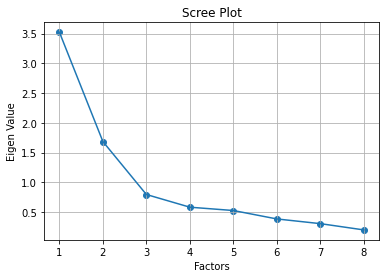

In [12]:
from factor_analyzer import FactorAnalyzer, Rotator

fa = FactorAnalyzer(rotation = 'varimax' ,impute = "drop",n_factors=df4_fa.shape[1])
fa.fit(df4_fa)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df4_fa.shape[1]+1),ev)
plt.plot(range(1,df4_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

From the graph, we can see that the eigenvalues drop below 1 from the 2th factor. So, the optimal number of factors is 3.

In contrast to PCA, the goal of FA (if it is orthogonal rotation = varimax) is to reproduce the correlation matrix with a few orthogonal factors.

**e) Interpreting the factors**

Create an optimal number of factors i.e. 6 in our case. Then, we have to interpret the factors by making use of loadings, variance, and commonalities.

In [13]:
#fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', is_corr_matrix=False, impute='drop', svd_method='randomized')

fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='drop', svd_method='randomized', rotation_kwargs=None)
fa.fit(df4_fa)

fa_loading_matrix = pd.DataFrame(fa.loadings_, columns=['FA{}'.format(i) for i in range(1, 3+1)],index=df4_fa.columns)

fa_loading_matrix['Highest_loading'] = fa_loading_matrix.idxmax(axis=1)
fa_loading_matrix['Communality'] = fa.get_communalities()
#fa_loading_matrix = fa_loading_matrix.sort_values('Highest_loading')
fa_loading_matrix = fa_loading_matrix.sort_values('Communality', ascending=False)
fa_loading_matrix 

,FA1,FA2,FA3,Highest_loading,Communality
D02F04,0.759640,0.500491,0.006175,FA1,0.827583
D02F01,-0.018239,0.897644,0.016978,FA2,0.806385
D02F08,0.024401,-0.166675,0.875138,FA3,0.794242
D02F02,0.431652,0.736998,0.059753,FA2,0.733060
D02F05,0.786793,0.252380,0.207622,FA1,0.725846
D02F07,0.344543,0.295284,0.718074,FA3,0.721533
D02F06,0.704764,-0.290773,0.357027,FA1,0.708709
D02F03,0.546892,0.171080,0.596410,FA3,0.684065


In [14]:
from factor_analyzer import FactorAnalyzer, Rotator
from sklearn.utils.extmath import randomized_svd

rotator = Rotator(method='varimax', normalize=True, power=4, kappa=0, gamma=0, delta=0.01, max_iter=1000, tol=1e-5)

fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='drop', svd_method='randomized', rotation_kwargs=None)
fa.fit(df4_fa)

fa_loading_matrix = pd.DataFrame(rotator.fit_transform(fa.loadings_))

fa_loading_matrix

,0,1,2
0,-0.019486,0.897615,0.017124
1,0.430644,0.737591,0.059708
2,0.546872,0.171751,0.596235
3,0.758943,0.501551,0.005973
4,0.786516,0.253447,0.207371
5,0.705301,-0.289843,0.356722
6,0.344395,0.295654,0.717993
7,0.024956,-0.166777,0.875103


In [15]:
from factor_analyzer import FactorAnalyzer, Rotator
from sklearn.utils.extmath import randomized_svd

fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='drop', svd_method='randomized', rotation_kwargs=None)
fa.fit(df4_fa)


rotator = Rotator(method='varimax', normalize=True, power=4, kappa=0, gamma=0, delta=0.01, max_iter=1000, tol=1e-5)
rotator.fit_transform(fa.loadings_)

fa_loading_matrix = pd.DataFrame(rotator.fit_transform(fa.loadings_))

fa_loading_matrix = pd.DataFrame(rotator.fit_transform(fa.loadings_), columns=['FA{}'.format(i) for i in range(1, 3+1)],index=df4_fa.columns)
fa_loading_matrix['Highest_loading'] = fa_loading_matrix.idxmax(axis=1)
fa_loading_matrix['Communality'] = fa.get_communalities()
#fa_loading_matrix = fa_loading_matrix.sort_values('Highest_loading')
fa_loading_matrix = fa_loading_matrix.sort_values('Communality', ascending=False)
fa_loading_matrix


,FA1,FA2,FA3,Highest_loading,Communality
D02F04,0.758943,0.501551,0.005973,FA1,0.827583
D02F01,-0.019486,0.897615,0.017124,FA2,0.806385
D02F08,0.024956,-0.166777,0.875103,FA3,0.794242
D02F02,0.430644,0.737591,0.059708,FA2,0.733060
D02F05,0.786516,0.253447,0.207371,FA1,0.725846
D02F07,0.344395,0.295654,0.717993,FA3,0.721533
D02F06,0.705301,-0.289843,0.356722,FA1,0.708709
D02F03,0.546872,0.171751,0.596235,FA3,0.684065


This table contains the rotated factor loadings, which represent both how the variables are weighted for each factor but also the correlation between the variables and the factor.  Because these are correlations, possible values range from -1 to +1.  We used the option blank (.40), which tells code not to print any of the correlations that are .4 or less.  This makes the output easier to read by removing the clutter of low correlations that are probably not meaningful anyway.


Communalitie is the h2 and can be defined as the sum of squared factor loadings for the variables.

In [16]:
df_7 = fa_loading_matrix

df_7.loc[df_7['FA1'] < 0.4, "FA1" ] = 0.0
df_7.loc[df_7['FA2'] < 0.4, "FA2" ] = 0.0
df_7.loc[df_7['FA3'] < 0.4, "FA3" ] = 0.0

cols_to_sum = ['FA1', 'FA2', 'FA3']
df_7['New Communality'] = (df_7[cols_to_sum]**2).sum(axis = 1)

df_7 = df_7.sort_values('New Communality', ascending=False)

print("We used the option blank which tells code not to print any of the correlations that are 0.4 or less. ")

#df_7.drop('Communality', axis=1, inplace=True)

df_7


We used the option blank which tells code not to print any of the correlations that are 0.4 or less. 


,FA1,FA2,FA3,Highest_loading,Communality,New Communality
D02F04,0.758943,0.501551,0.000000,FA1,0.827583,0.827547
D02F01,0.000000,0.897615,0.000000,FA2,0.806385,0.805712
D02F08,0.000000,0.000000,0.875103,FA3,0.794242,0.765805
D02F02,0.430644,0.737591,0.000000,FA2,0.733060,0.729495
D02F03,0.546872,0.000000,0.596235,FA3,0.684065,0.654566
D02F05,0.786516,0.000000,0.000000,FA1,0.725846,0.618608
D02F07,0.000000,0.000000,0.717993,FA3,0.721533,0.515514
D02F06,0.705301,0.000000,0.000000,FA1,0.708709,0.497449


D02F01 = Have functional suitability

D02F02 = Have performance

D02F03 = Have compatibility

D02F04 = Have usability

D02F05 = Have reliability

D02F06 = Have security

D02F07 = Have maintainability

D02F08 = Have portability

In [17]:
communalities = pd.DataFrame (fa.get_communalities(), index=list(df4_fa.columns))
feat = list(communalities[communalities[0] > 0.2].index)
print ('Total variable/features with communalities > 0.2 is {}'.format(len(feat)))

Total variable/features with communalities > 0.2 is 8


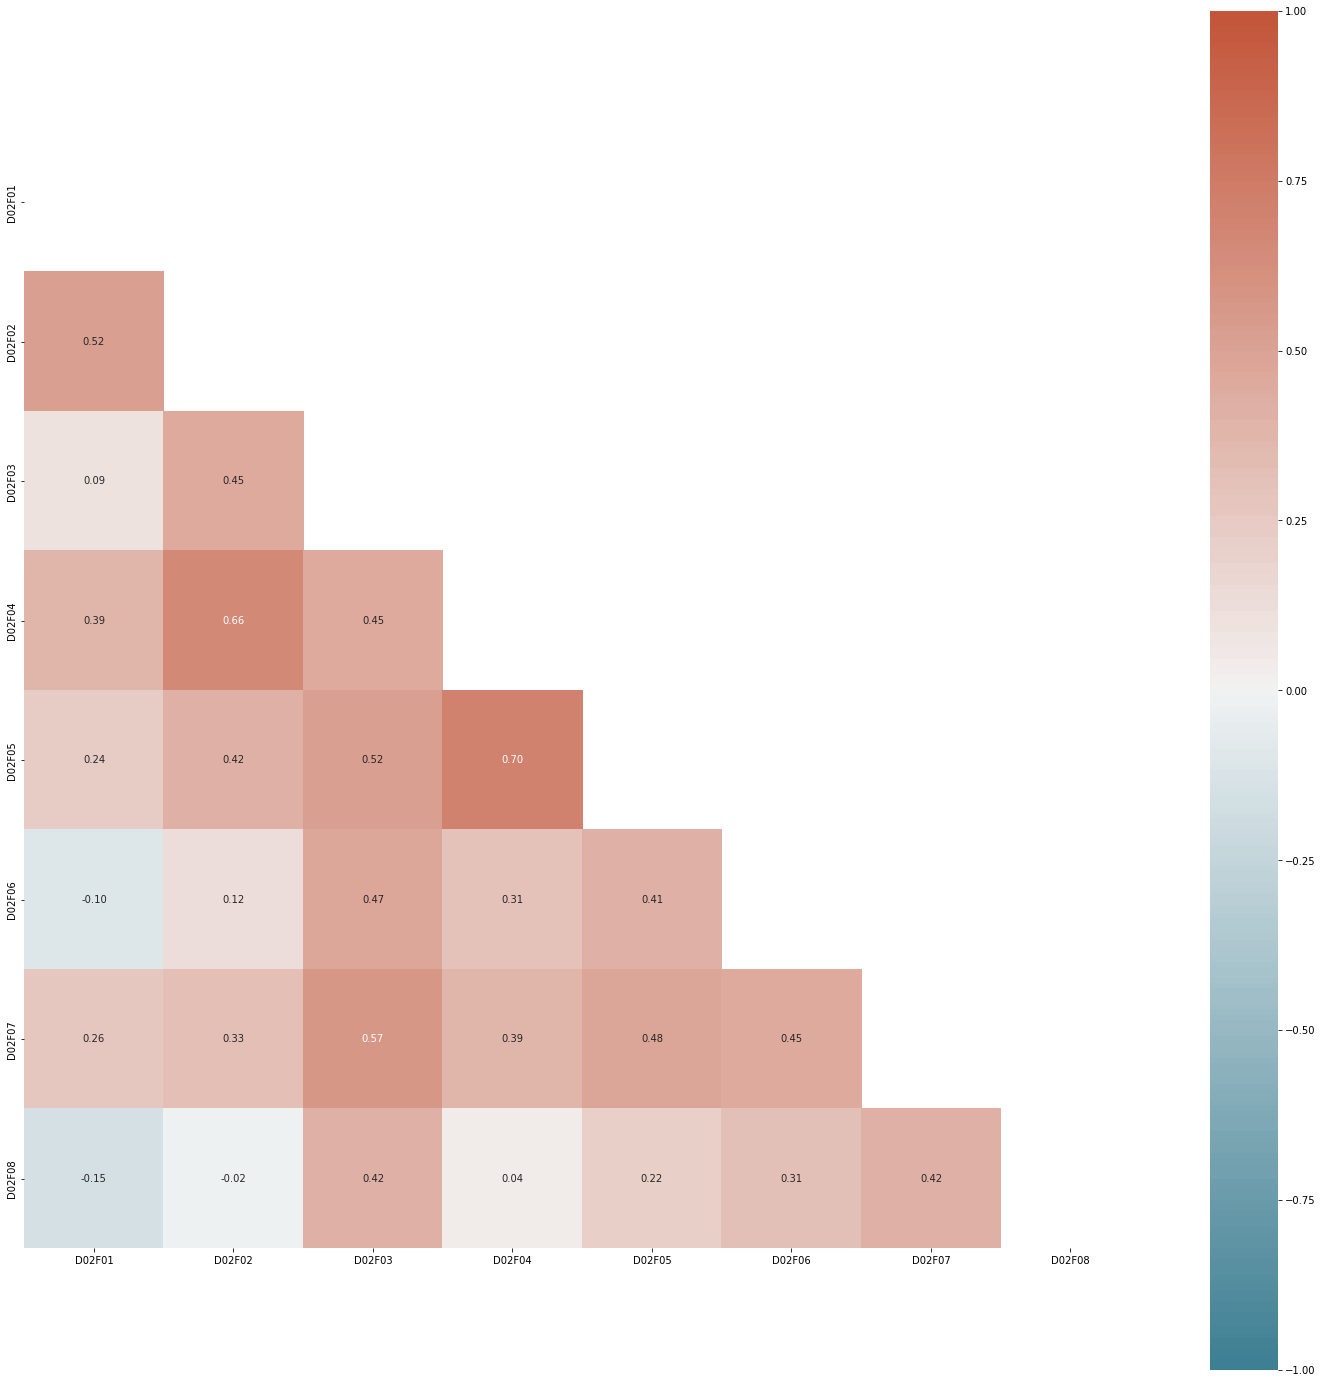

In [18]:
import seaborn as sns

plt.figure(figsize=(25,25))

# plot the heatmap for correlation matrix
corr = df4_fa.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 mask=mask, square=True, 
                 annot=True, fmt='.2f')

[Text(0, 0.5, 'FA1'), Text(0, 1.5, 'FA2'), Text(0, 2.5, 'FA3')]

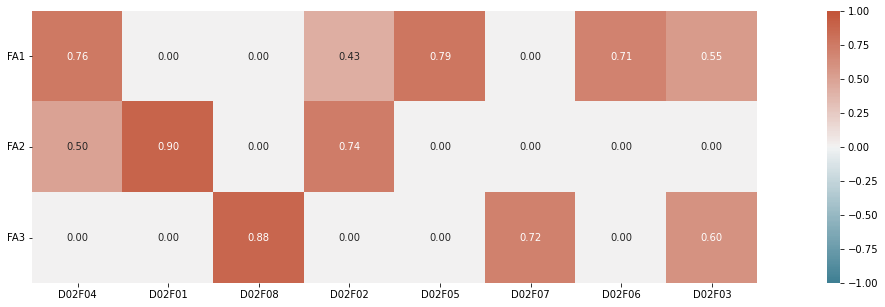

In [19]:
import seaborn as sns

plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(fa_loading_matrix.drop(['Highest_loading','Communality', 'New Communality'], 
                 axis=1).T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0)

**f) Only variables with loading of 0.4 are interpreted**

As a rule of thumb, only variables with loading of 0.32 and above are interpreted. The greater the loading, the more the variable is a pure measure of the factor. 

Comrey and Lee (1992) suggest that loadings of:

\>71% (50% overlapping variance) are considered excellent;

\>63% (40% overlapping variance) very good;

\>55% (30% overlapping variance) good;

\>45% (20% overlapping variance) fair;

\<32% (10% overlapping variance) poor;

In [20]:
import numpy as np

fa.fit(df4_fa.values)

print ("Matriz de transformação de componentes")
#fa.corr_
fa.rotation_matrix_

df_rm = pd.DataFrame(fa.rotation_matrix_)
df_t = df_rm.transpose()

df_t.columns = ['FA1', 'FA2', 'FA3']
df_t

Matriz de transformação de componentes


,FA1,FA2,FA3
0,0.741624,-0.059576,-0.668166
1,0.449238,0.783815,0.428740
2,0.498176,-0.618130,0.608060


In [21]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', bounds=(0.005, 1), is_corr_matrix=False, impute='drop', svd_method='randomized')
fa.fit(df4_fa)
print(pd.DataFrame(fa.loadings_,index=df4_fa.columns))

               0         1         2
D02F01 -0.018239  0.897644  0.016978
D02F02  0.431652  0.736998  0.059753
D02F03  0.546892  0.171080  0.596410
D02F04  0.759640  0.500491  0.006175
D02F05  0.786793  0.252380  0.207622
D02F06  0.704764 -0.290773  0.357027
D02F07  0.344543  0.295284  0.718074
D02F08  0.024401 -0.166675  0.875138


**3.2) Factor Analysis Model**


The amount of variance explained by each factor can be found out using the ‘get_factor_variance’ function.


In [22]:
print("Somas de rotação de carregamentos ao quadrado")

print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var %','Cumulative Var %']))

df_rot =pd.DataFrame(fa.get_factor_variance())
df_rot = df_rot.transpose()

df_rot.columns = ['Total', 'Proportional Var (%)', 'Cumulative Var (%)']
df_rot.loc[df_rot['Proportional Var (%)'] < 1, "Proportional Var (%)"] = df_rot['Proportional Var (%)']*100 
df_rot.loc[df_rot['Cumulative Var (%)'] < 1, "Cumulative Var (%)"] = df_rot['Cumulative Var (%)']*100 

df_rot


Somas de rotação de carregamentos ao quadrado
                           0         1         2
Variance            2.297841  1.891908  1.811674
Proportional Var %  0.287230  0.236488  0.226459
Cumulative Var %    0.287230  0.523719  0.750178


,Total,Proportional Var (%),Cumulative Var (%)
0,2.297841,28.723011,28.723011
1,1.891908,23.648849,52.371860
2,1.811674,22.645923,75.017783


In [23]:
print(pd.DataFrame(fa.get_factor_variance()))


          0         1         2
0  2.297841  1.891908  1.811674
1  0.287230  0.236488  0.226459
2  0.287230  0.523719  0.750178


**a) Variance Explained by Factors**

The first row represents the variance explained by each factor. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 3 factors together are able to explain 70.24% of the total variance.

In unrotated cases, the variances would be equal to the eigenvalues. Rotation changes the distribution of proportional variance but the cumulative variance will remain the same. Oblique rotations allow correlation between the factors while the orthogonal rotations keep the factors uncorrelated.

**b) Communalities**

Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.



In [24]:
print(pd.DataFrame(fa.get_communalities(),index=df4_fa.columns,columns=['Communalities']))

        Communalities
D02F01       0.806385
D02F02       0.733060
D02F03       0.684065
D02F04       0.827583
D02F05       0.725846
D02F06       0.708709
D02F07       0.721533
D02F08       0.794242


In [25]:

print("The original eigenvalues, The common factor eigenvalues")
print(pd.DataFrame(fa.get_eigenvalues()))

The original eigenvalues, The common factor eigenvalues
          0         1         2         3         4         5         6  \
0  3.521583  1.684734  0.795106  0.581993  0.526116  0.384606  0.305665   
1  3.264280  1.456861  0.565999  0.328467  0.255558  0.122387  0.045793   

          7  
0  0.200197  
1 -0.037923  


**c) Confirmatory Factor Analysis**

In [26]:
import pandas as pd
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)

model_dict = df4_fa
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df4_fa, None)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=True, max_iter=250, impute='median', n_obs=None, tol=5, is_cov_matrix=False, bounds=None)
cfa.fit(df4_fa.values)
cfa.loadings_


/usr/local/lib/python3.7/dist-packages/factor_analyzer/confirmatory_factor_analyzer.py:754: UserWarning: The optimization routine failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  f"The optimization routine failed to converge: {str(res.message)}"


array([[0.98574794, 0.9857478 , 0.98574788, 0.98574781, 0.98574784,
        0.98574784, 0.98574784, 0.98574781],
       [1.00398823, 1.00398812, 1.0039883 , 1.00398831, 1.0039883 ,
        1.00398816, 1.00398828, 1.00398812],
       [0.95460824, 0.95460821, 0.95460827, 0.95460805, 0.95460824,
        0.95460816, 0.95460805, 0.95460824],
       [0.94406849, 0.9440683 , 0.94406839, 0.94406844, 0.94406844,
        0.94406844, 0.94406844, 0.94406833],
       [0.94732882, 0.94732876, 0.94732879, 0.94732879, 0.94732876,
        0.94732887, 0.94732879, 0.94732879],
       [0.96820399, 0.96820402, 0.96820402, 0.96820399, 0.96820399,
        0.96820399, 0.96820399, 0.9682038 ],
       [1.02458625, 1.02458625, 1.02458625, 1.02458625, 1.02458625,
        1.02458625, 1.02458625, 1.02458625],
       [0.96248419, 0.96248422, 0.96248422, 0.96248411, 0.96248414,
        0.96248411, 0.96248411, 0.96248422]])

In [27]:

from sklearn.decomposition import FactorAnalysis

X = df4_fa
fa= FactorAnalysis(n_components=3, tol=5, copy=True, max_iter=5, noise_variance_init=None, svd_method='randomized', iterated_power=1, rotation='varimax', random_state=0)
fa.fit(X)

fa.components_

fa_load = pd.DataFrame(fa.components_)

#fa_load = fa_load.transpose()

fa_load


,0,1,2,3,4,5,6,7
0,0.005389,-0.371143,-0.245673,-0.442628,-0.420048,-0.354856,-0.159250,0.003228
1,-1.000837,-0.706936,-0.136121,-0.344432,-0.190541,0.110550,-0.303498,0.193178
2,0.006117,-0.169683,-0.473921,-0.140857,-0.267836,-0.504040,-0.761302,-0.711089
